In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [25]:
data = pd.read_csv('../../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(15)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1
4219,KAZ,2009,6.146885,15.481175,-6.000000,1.365885e+11,Kazakhstan,0.574,231.315634,0.211701,-0.113273,63.434933,-0.101801,-0.005601
1313,CAF,1990,38.333870,0.000000,-7.000000,1.492781e+09,Central African Republic,0.786,1042.998333,-0.009947,-0.067600,254.726667,0.021908,-0.016365
6534,POL,2013,3.226525,0.068020,10.000000,4.423401e+11,Poland,0.069,533.904472,0.049920,0.090935,86.055894,0.006496,-0.041280
7191,SLE,1964,34.837112,0.000000,6.000000,2.067881e+09,Sierra Leone,0.797,2175.152778,-0.026696,-0.107186,256.354167,-0.013614,0.011555
8241,TUR,1989,16.585981,0.206769,9.000000,2.642534e+11,Turkey,0.311,402.079522,-0.342405,0.065799,106.448933,0.038719,0.003825
4312,KHM,1974,47.724560,0.000000,-5.000000,3.581475e+09,Cambodia,0.206,1588.232240,0.272089,-0.178311,264.790984,-0.018677,0.003562
989,BLR,1986,22.863740,0.225994,-7.000000,1.921909e+10,Belarus,0.363,501.427827,-0.126675,0.194441,59.419643,0.260755,-0.251424
6149,NZL,2012,5.517394,0.607739,10.000000,1.610356e+11,New Zealand,0.477,1294.892241,-0.089702,0.064200,103.834770,-0.030298,-0.013645
5315,MLI,2010,33.016830,0.000000,7.000000,1.100911e+10,Mali,0.852,316.563889,0.191694,-0.029549,297.193452,0.007352,0.021563
5461,MRT,1964,26.861473,0.000000,-7.000000,1.342268e+09,Mauritania,0.601,101.755037,0.096710,-0.055220,281.471154,0.000286,0.001862


In [26]:
import sys
sys.path.insert(0, '.')
sys.path.insert(1, '../../01_exploratory_data_analysis/rainfall')

from utils import diff

### Add features

- GDP variation
- Rainfall difference from all-time average
- Number of years in a row we are below average

In [27]:
gdp_g = pd.DataFrame()
for country in data['ISO3_code'].unique():
    gdp = data[data['ISO3_code']==country].gdp
    gdp_diff = diff(gdp)
    gdp_diff = np.concatenate(([gdp_diff[0]], gdp_diff))

    years = data[data['ISO3_code']==country].Year
    mean_rainfall = data[data['ISO3_code']==country].yearly_avg_rainfall.mean()
    avg_rainfall = data[data['ISO3_code']==country].yearly_avg_rainfall

    n_below = []
    prev = 0
    for i, yr in enumerate(years):
        if avg_rainfall.to_list()[i] < mean_rainfall:
            prev += 1
        else:
            prev = 0
        n_below.append(prev)

    to_add = pd.DataFrame({'ISO3_code': [country]*len(gdp_diff),
                           'Year': years,
                           'gdp_g': gdp_diff,
                           'rainfall_diff_from_mean_norm': (avg_rainfall - mean_rainfall)/mean_rainfall,
                           'n_below_rainfall': n_below
                          })
    gdp_g = pd.concat([gdp_g, to_add])

data = data.merge(gdp_g, on=['ISO3_code', 'Year'])

data.head(5)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,gdp_g,rainfall_diff_from_mean_norm,n_below_rainfall
0,AFG,1960,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.586,318.565807,-0.075064,-0.075064,116.206019,0.036755,0.036755,0.0,0.098045,0
1,AFG,1961,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.588,294.653108,-0.075064,-0.075064,120.477183,0.036755,0.036755,0.0,0.015622,0
2,AFG,1962,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.591,243.503638,-0.173592,-0.075064,117.250992,-0.026778,0.036755,0.0,-0.160682,1
3,AFG,1963,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.593,307.702050,0.263645,-0.173592,126.046296,0.075013,-0.026778,0.0,0.060600,0
4,AFG,1964,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.596,300.362434,-0.023853,0.263645,110.172619,-0.125935,0.075013,0.0,0.035301,0


In [28]:
subset = data[['ISO3_code',
               'Year',
               'yearly_avg_rainfall',
               'pt_gdp_agriculture',
               'gdp',
               'gdp_g',
               'oil_rent',
               'rainfall_diff_from_mean_norm',
               'n_below_rainfall'
              ]].copy()

subset.dropna(inplace=True)
subset[subset['ISO3_code']=='UGA']

,ISO3_code,Year,yearly_avg_rainfall,pt_gdp_agriculture,gdp,gdp_g,oil_rent,rainfall_diff_from_mean_norm,n_below_rainfall
8388,UGA,1960,957.014403,49.874860,4.983496e+09,0.000000,0.0,-0.067322,1
8389,UGA,1961,1275.412551,49.922844,4.983496e+09,0.000000,0.0,0.242980,0
8390,UGA,1962,1113.368313,49.180824,4.983496e+09,0.000000,0.0,0.085056,0
8391,UGA,1963,1138.208848,47.512920,4.983496e+09,0.000000,0.0,0.109265,0
8392,UGA,1964,1031.688272,47.243397,4.983496e+09,0.000000,0.0,0.005453,0
...,...,...,...,...,...,...,...,...,...
8447,UGA,2019,1298.510288,22.945509,3.960005e+10,0.064387,0.0,0.265490,0
8448,UGA,2020,1215.872428,23.929033,4.076877e+10,0.029513,0.0,0.184954,0
8449,UGA,2021,1122.934156,23.841805,4.221059e+10,0.035366,0.0,0.094379,0
8450,UGA,2022,1142.887860,24.011723,4.414722e+10,0.045880,0.0,0.113825,0


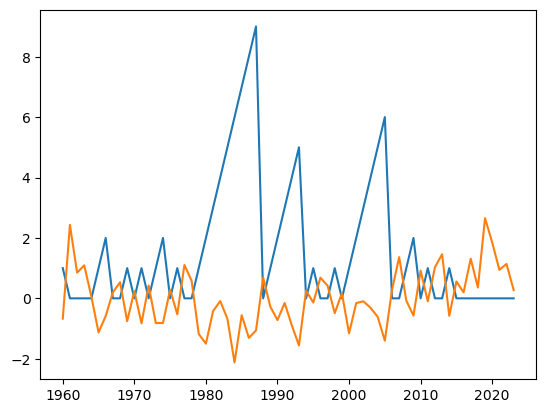

In [32]:
plt.plot(subset[subset['ISO3_code']=='UGA'].Year,
         subset[subset['ISO3_code']=='UGA'].n_below_rainfall)

plt.plot(subset[subset['ISO3_code']=='UGA'].Year,
         subset[subset['ISO3_code']=='UGA'].rainfall_diff_from_mean_norm*10)

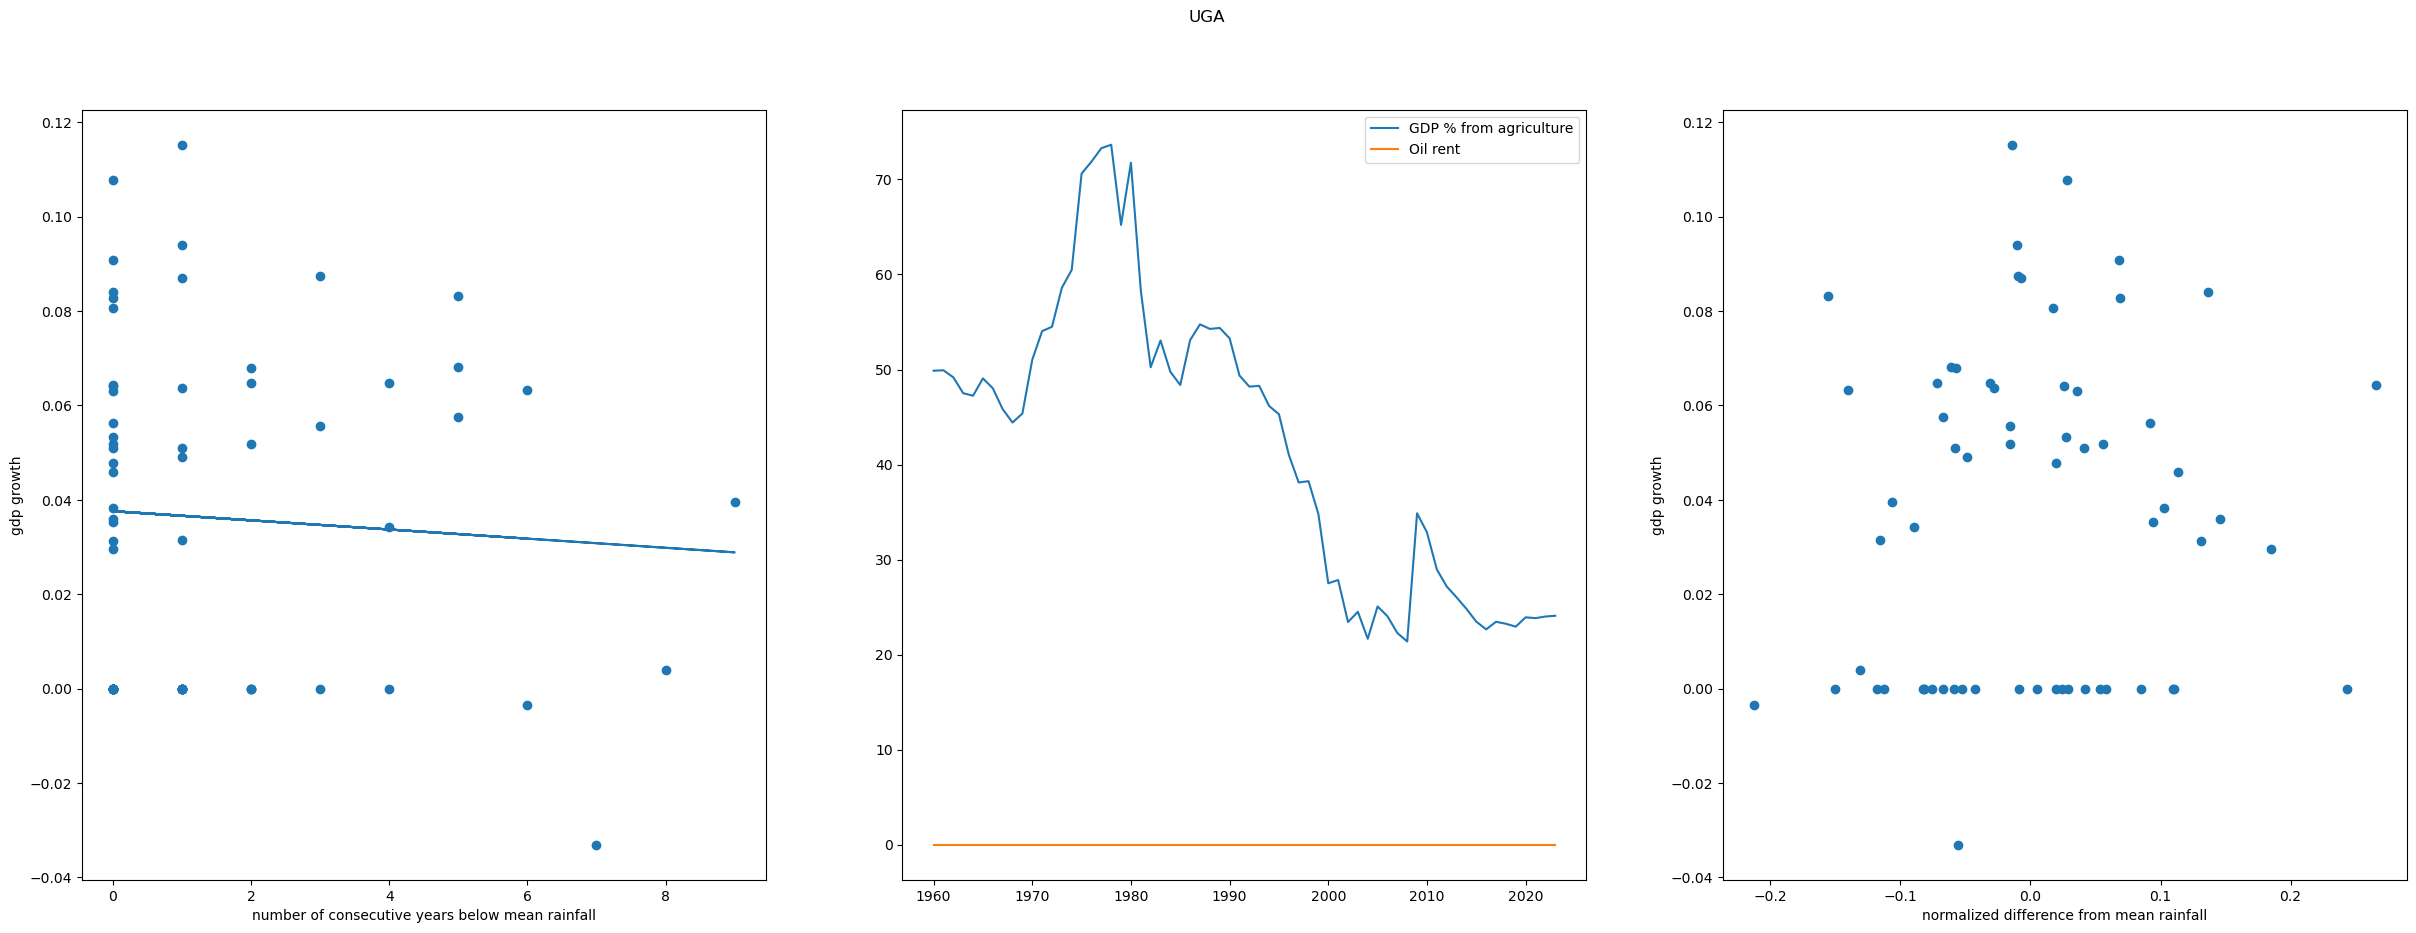

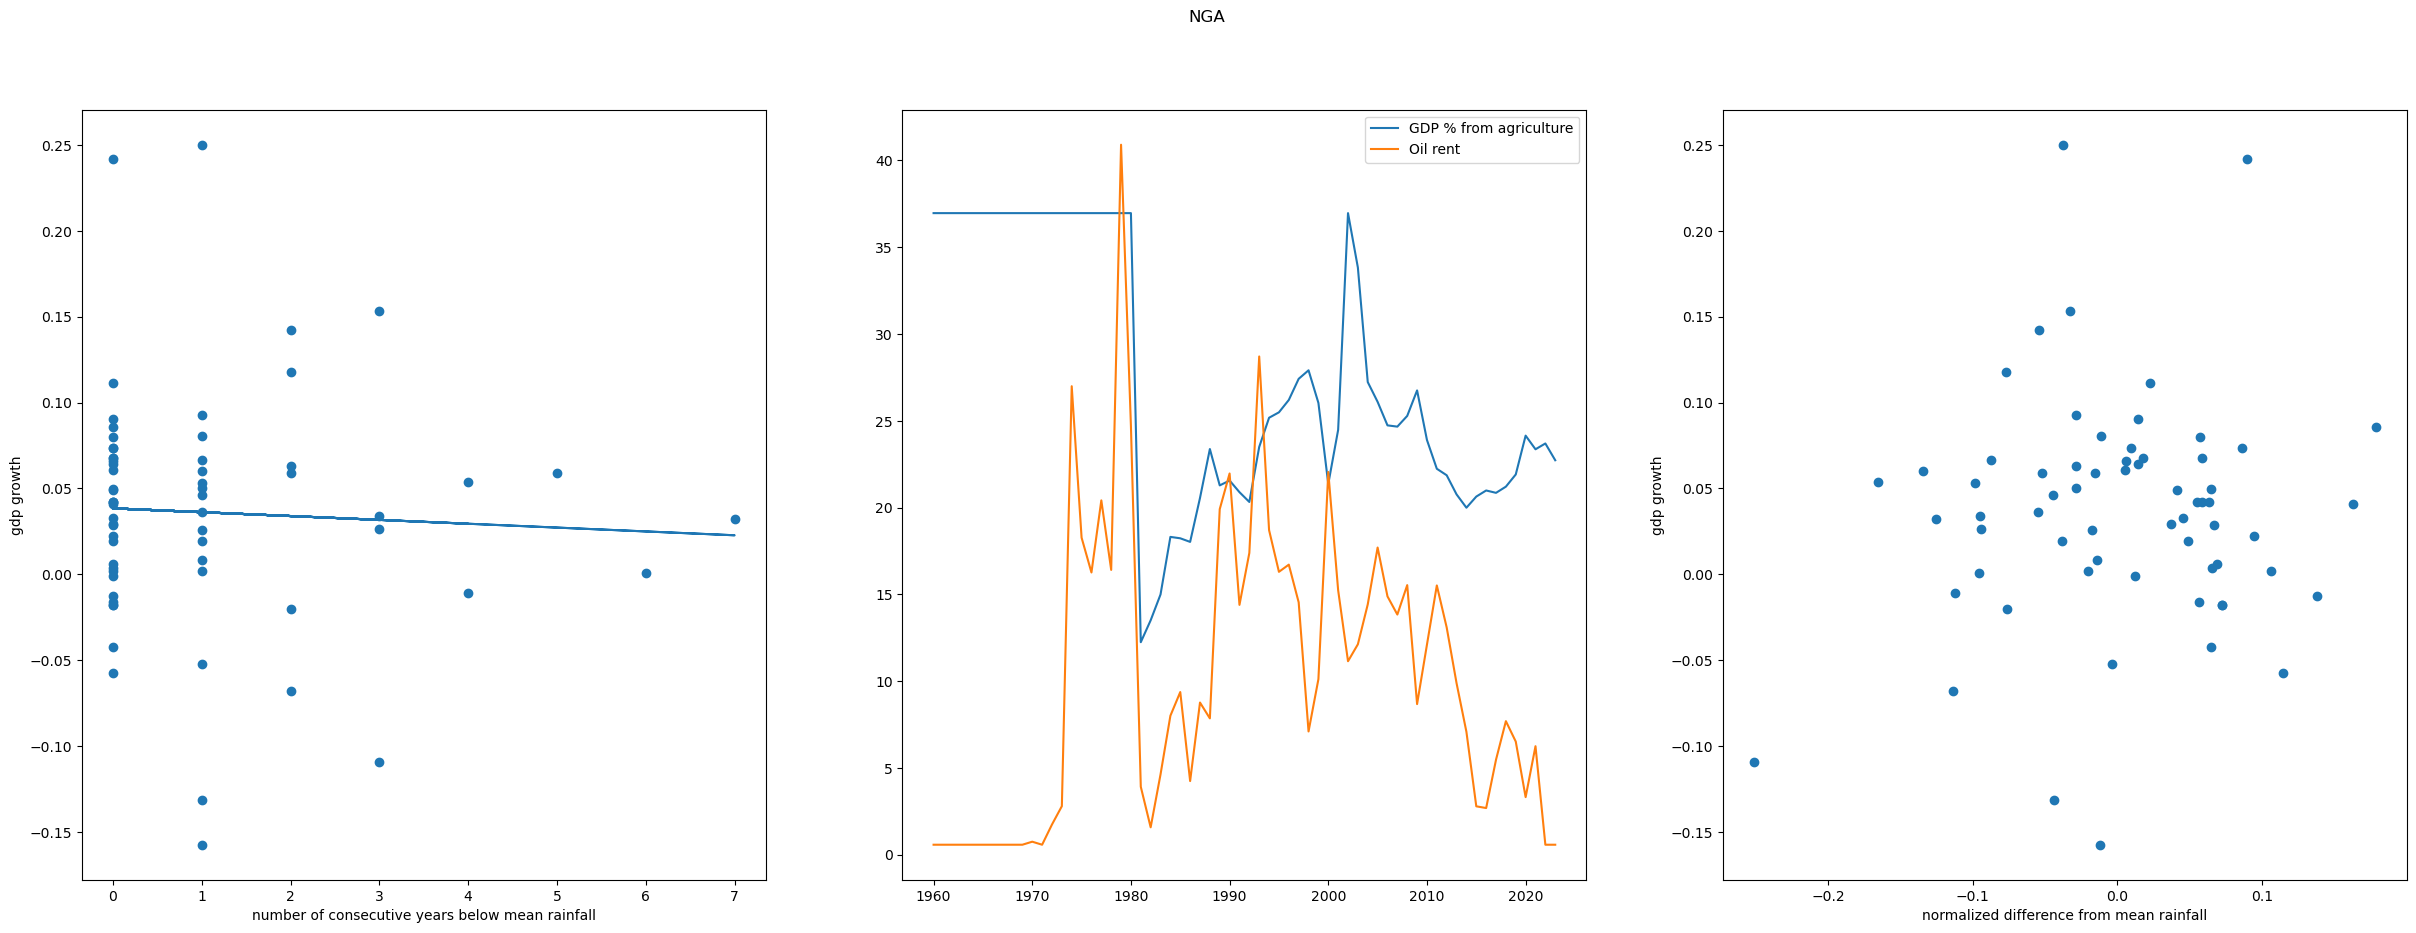

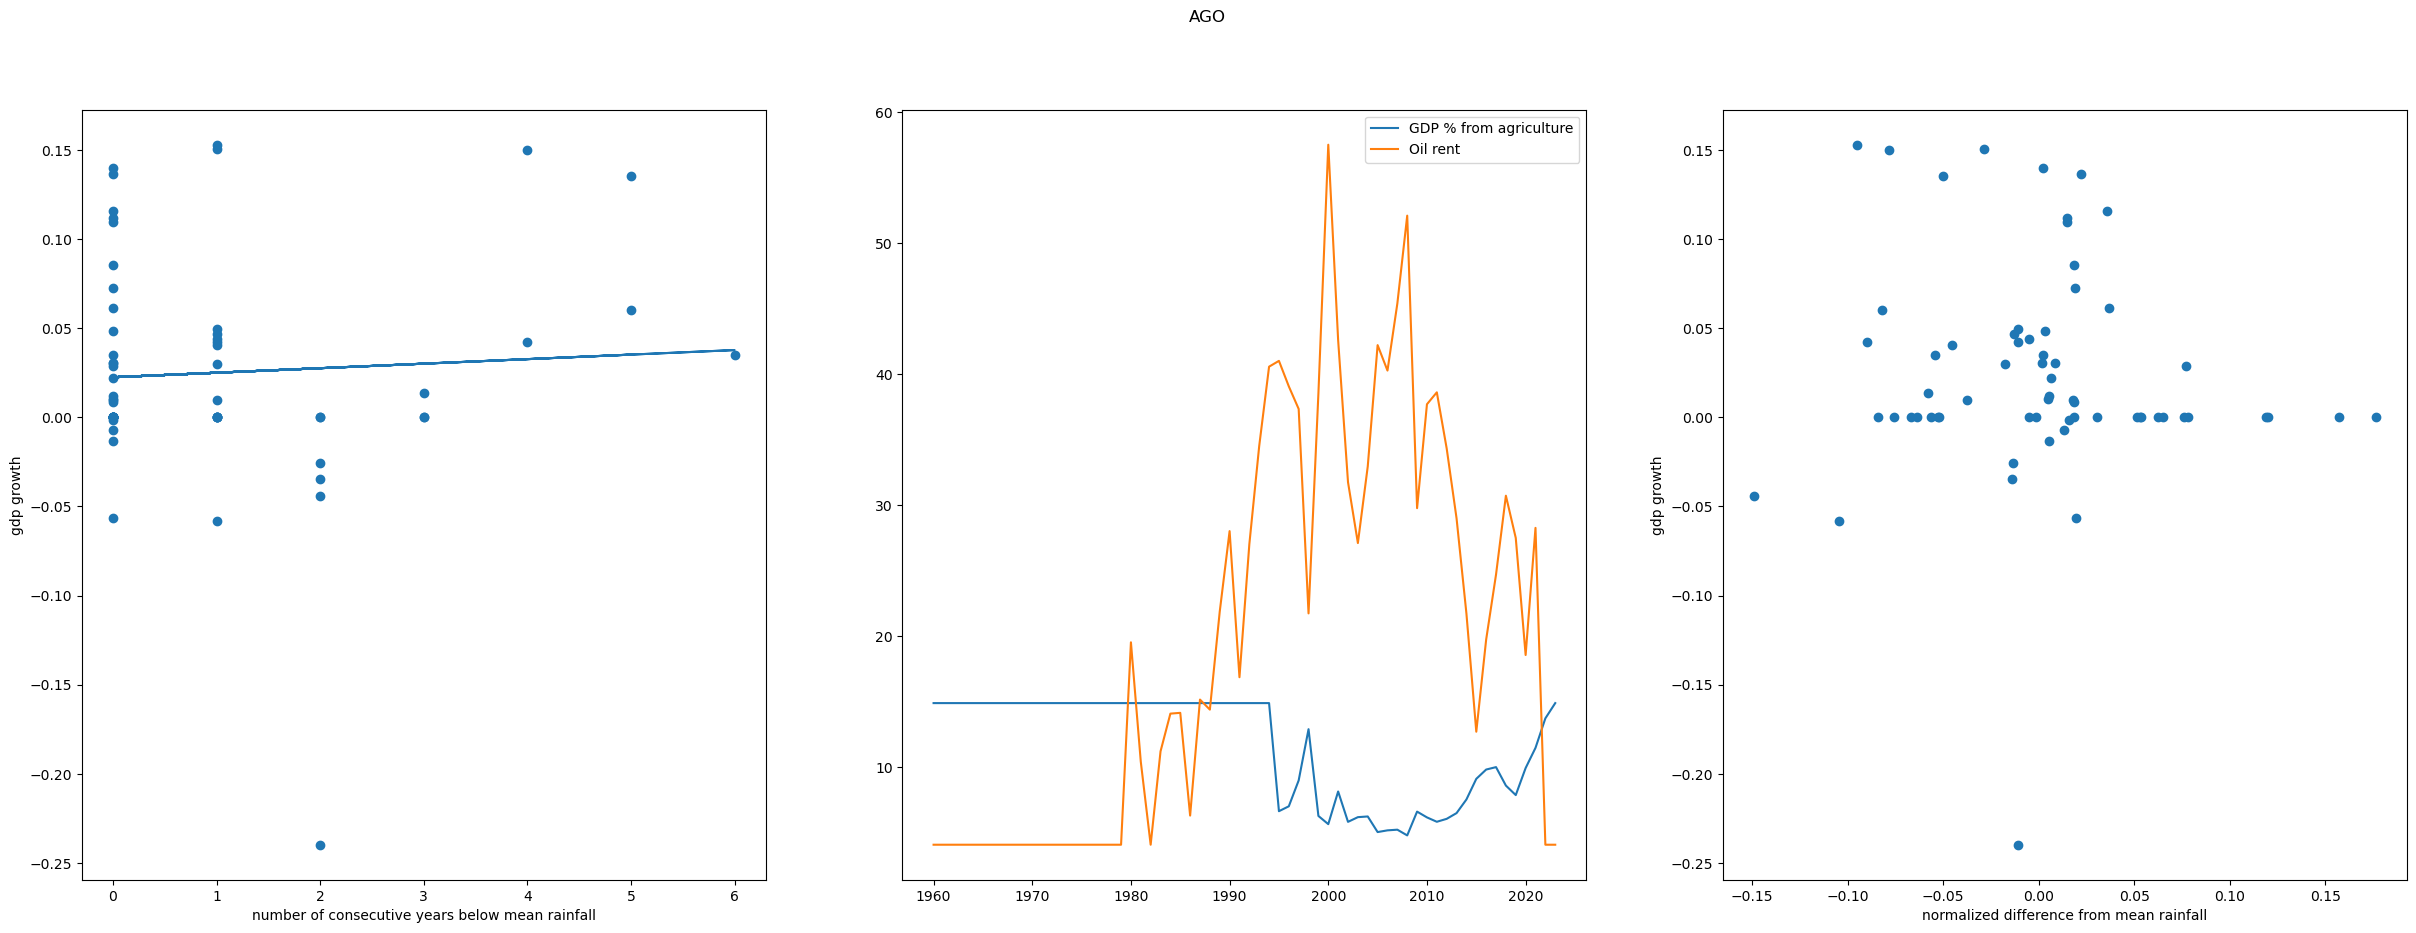

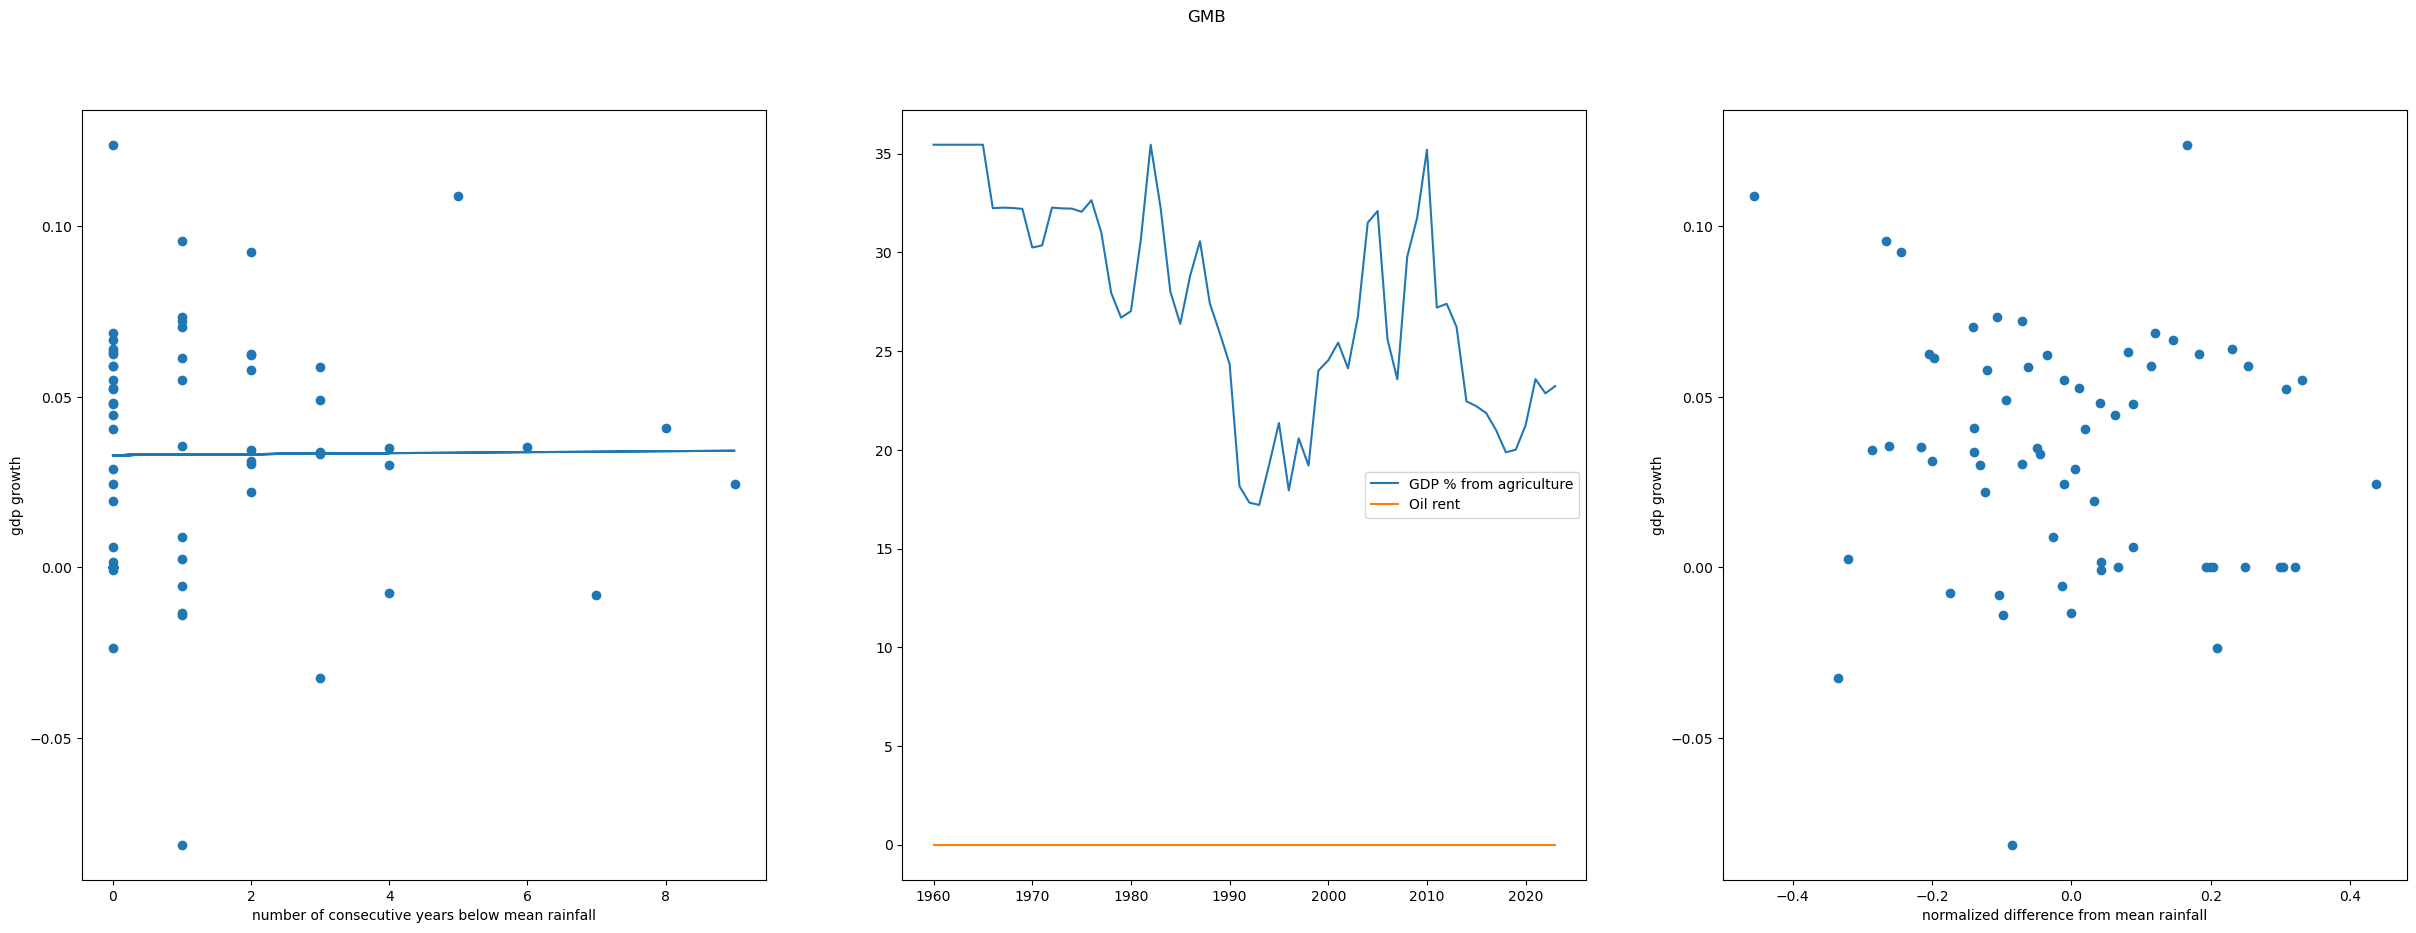

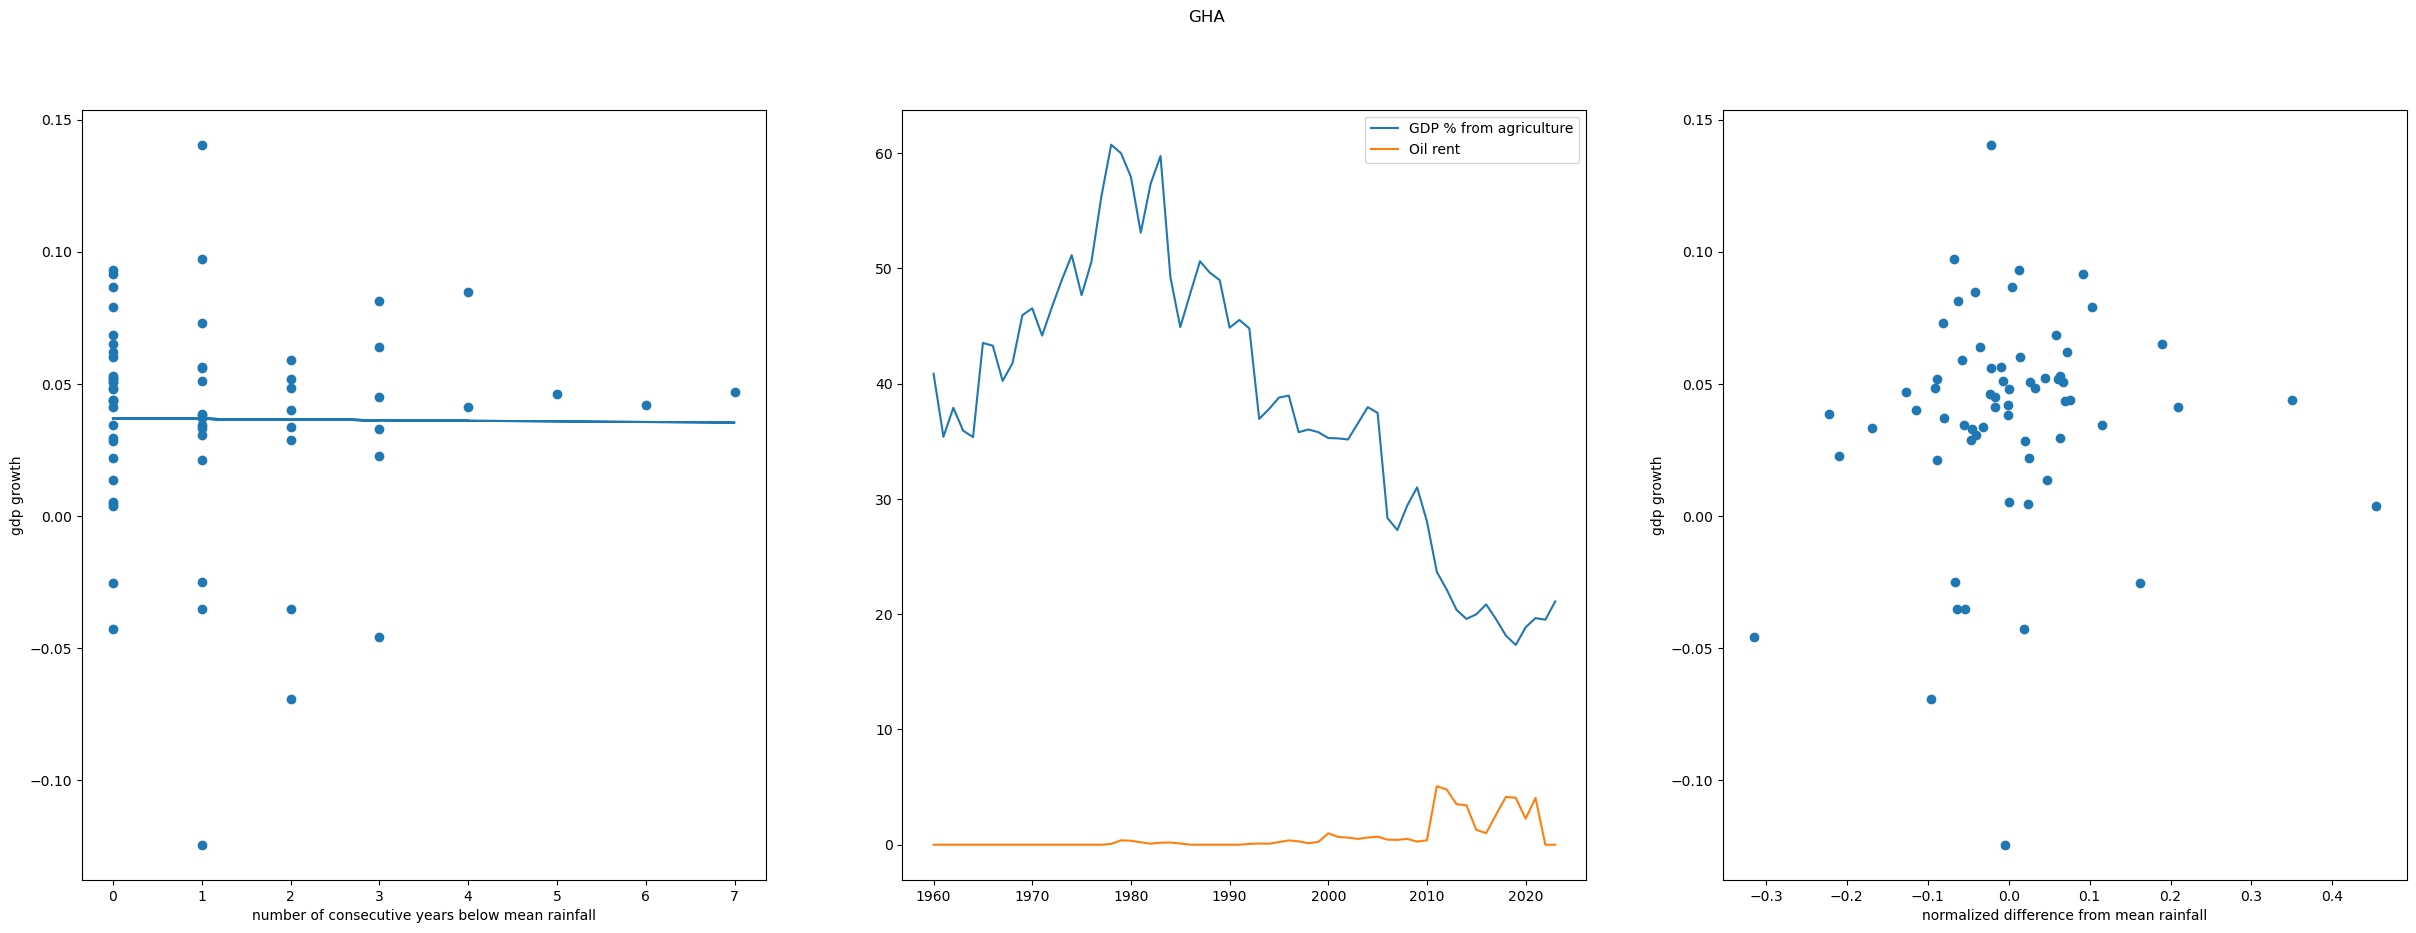

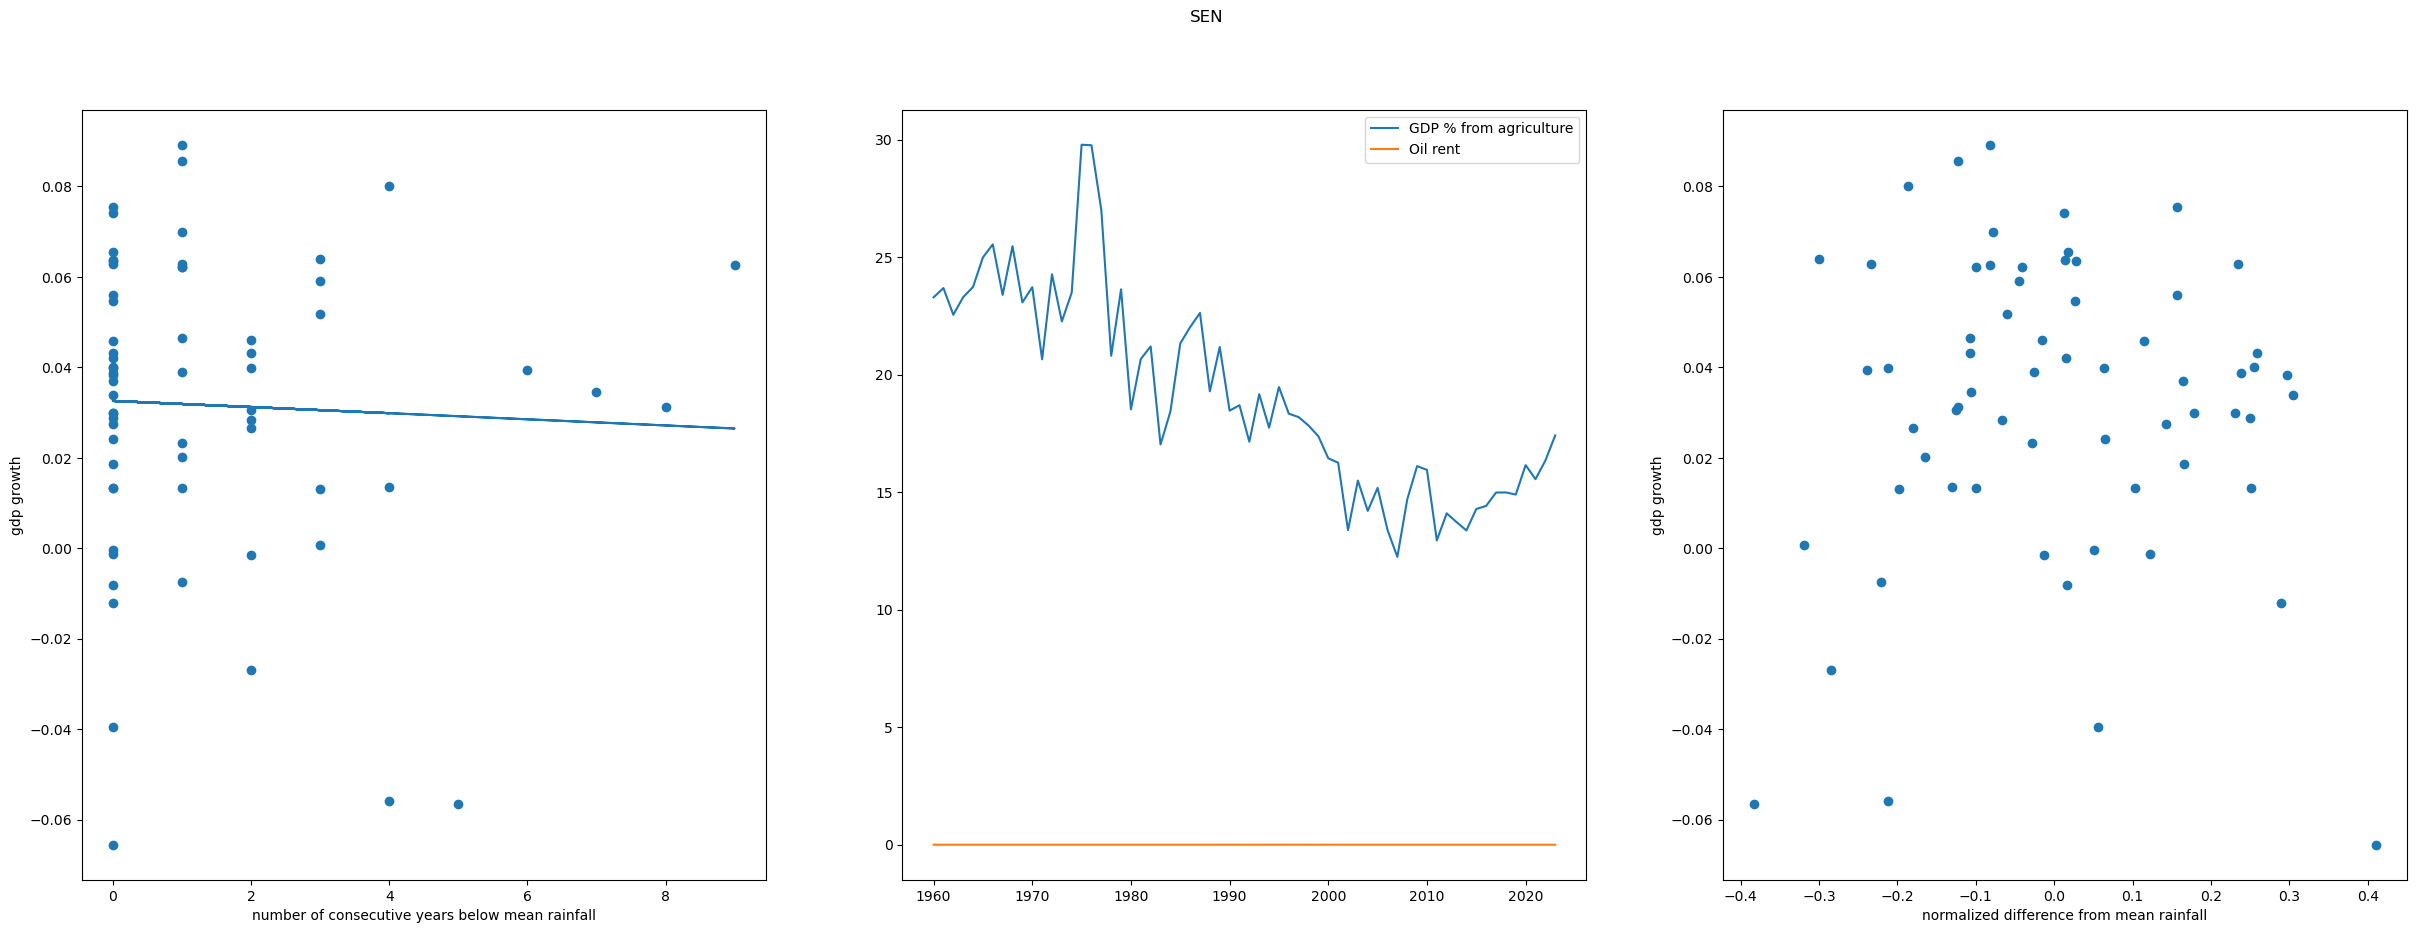

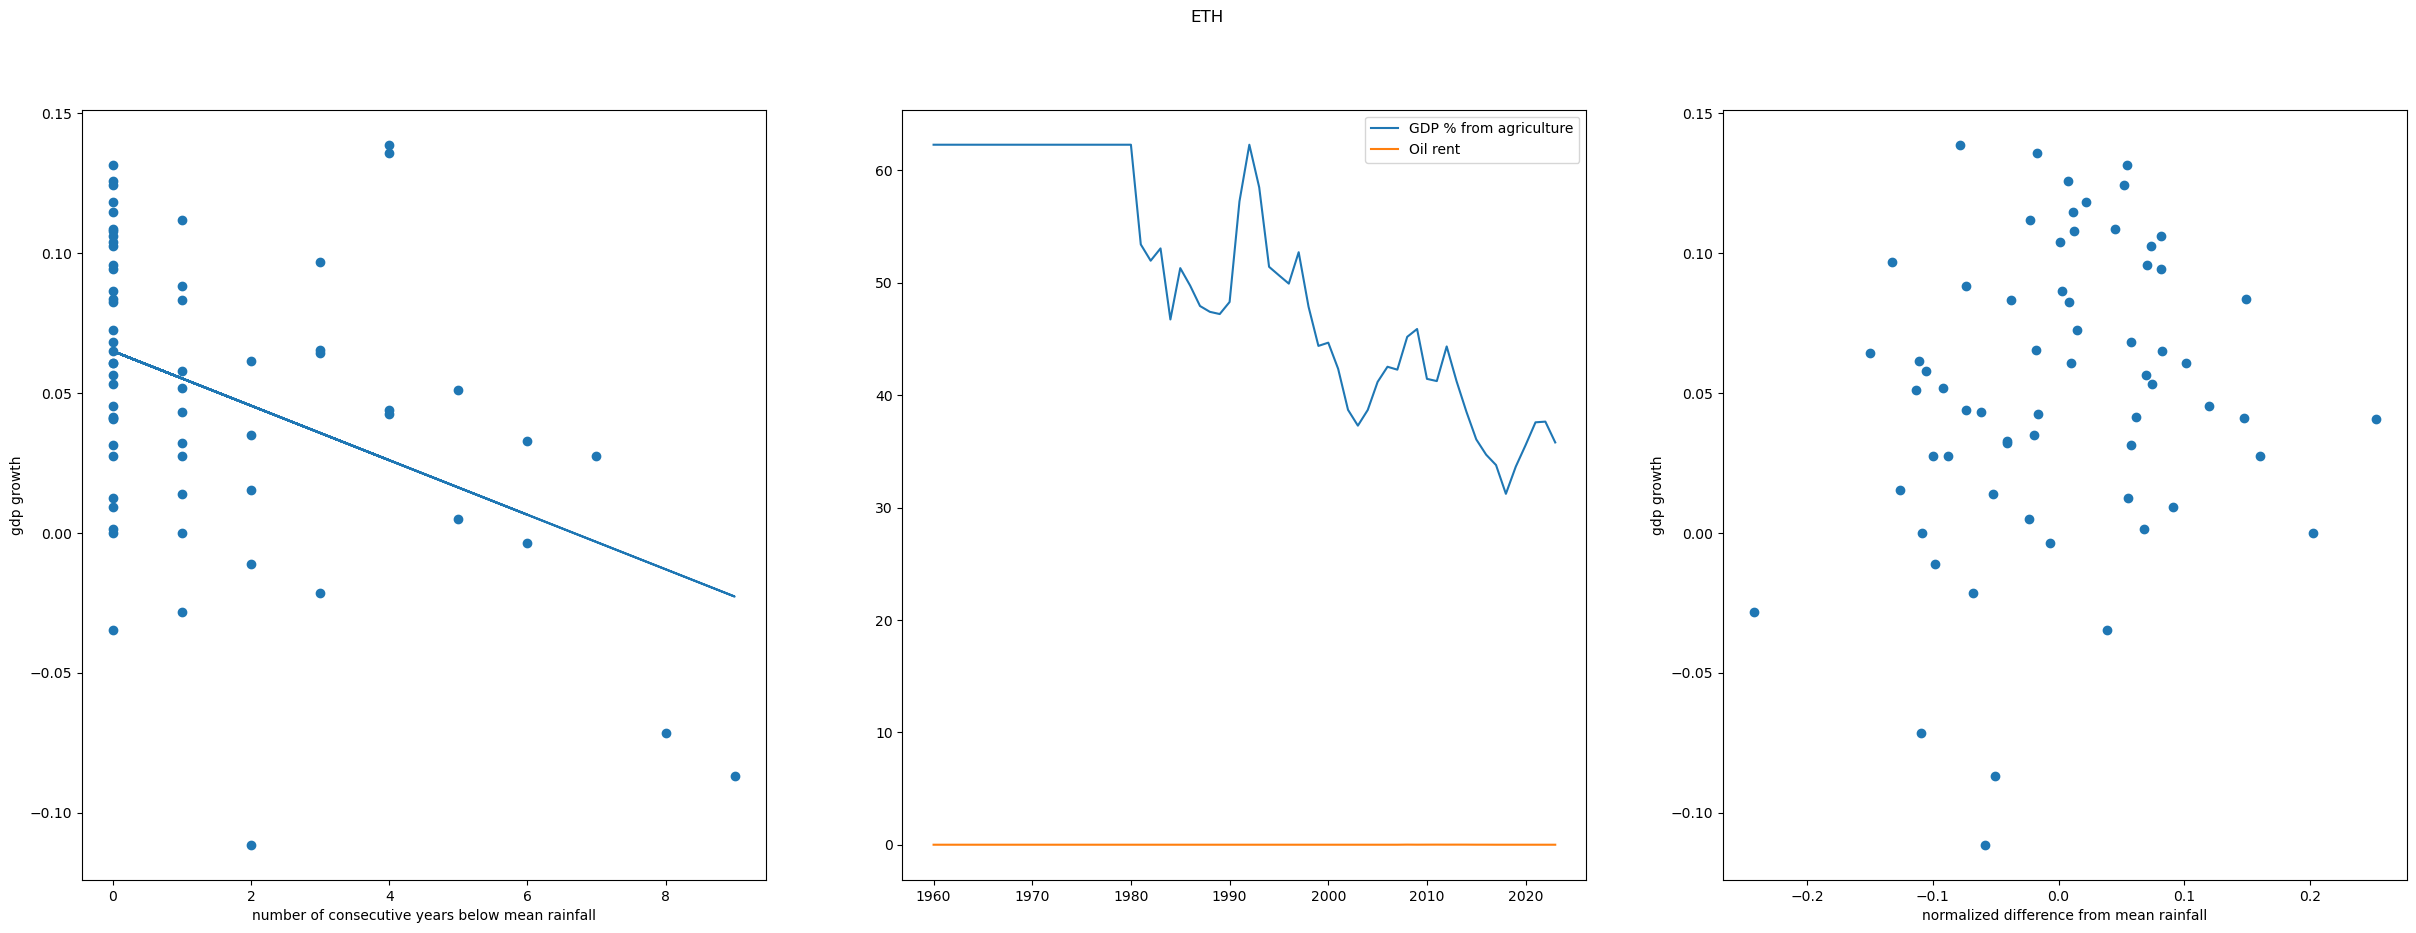

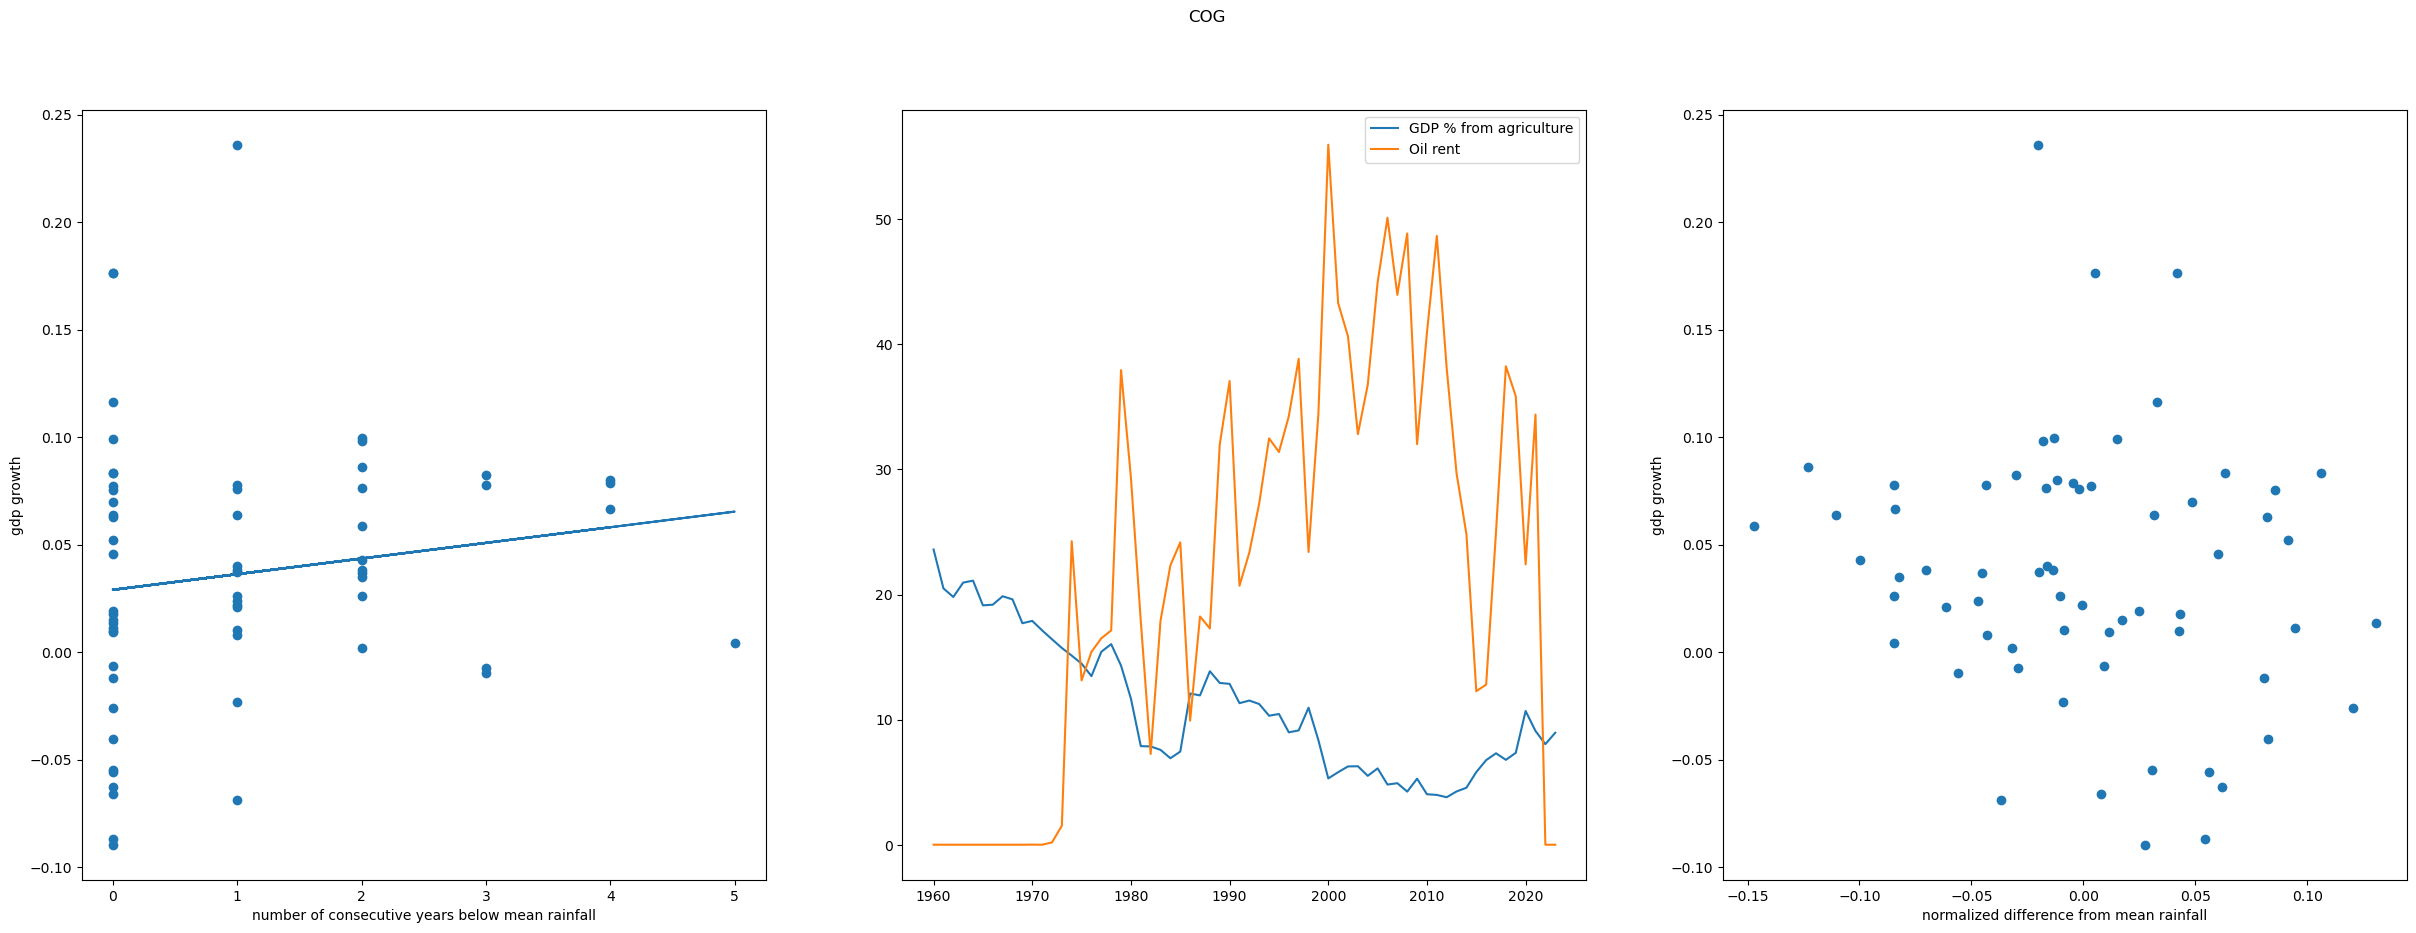

In [40]:
from sklearn.linear_model import LinearRegression

countries = ['UGA', 'NGA', 'AGO', 'GMB', 'GHA', 'SEN', 'ETH', 'COG']

for country in countries:
    fig, ax = plt.subplots(1,3,figsize=(30,10))
    country_subset = subset[subset['ISO3_code']==country]

    ax[0].scatter(country_subset['n_below_rainfall'], country_subset['gdp_g'])

    ols = LinearRegression()
    ols.fit(country_subset[['n_below_rainfall']], country_subset['gdp_g'])
    yp = ols.predict(country_subset[['n_below_rainfall']])
    ax[0].plot(country_subset['n_below_rainfall'], yp)

    ax[0].set_xlabel('number of consecutive years below mean rainfall')
    ax[0].set_ylabel('gdp growth')

    ax[1].plot(country_subset['Year'], country_subset['pt_gdp_agriculture'], label='GDP % from agriculture')
    ax[1].plot(country_subset['Year'], country_subset['oil_rent'], label='Oil rent')
    ax[1].legend()

    ax[2].scatter(country_subset['rainfall_diff_from_mean_norm'], country_subset['gdp_g'])
    ax[2].set_xlabel('normalized difference from mean rainfall')
    ax[2].set_ylabel('gdp growth')

    plt.suptitle(country)
    plt.show()
